# Rangkuman Chapter 7: Ensemble Learning and Random Forests

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 7 dengan implementasi Python untuk Ensemble Learning, termasuk Voting Classifiers, Bagging, Random Forests, Boosting, dan Stacking.

## 1. Pengenalan Ensemble Learning

**Wisdom of the crowd**: Aggregate answers dari thousands of random people sering better dari expert's answer.

**Ensemble Learning**: Aggregate predictions dari group of predictors untuk get better predictions.

### Key Concepts:
- **Ensemble**: Group of predictors
- **Ensemble method**: Algorithm yang menggunakan ensemble
- **Example**: Random Forest = ensemble of Decision Trees

### Why Ensemble Works:
- **Weak learners** → **Strong learner**
- Even jika each classifier hanya 51% accurate
- Ensemble dari 1,000 classifiers dapat achieve 75% accuracy!
- **Law of large numbers**: Errors cancel out

### Conditions:
✓ Predictors sufficiently diverse
✓ Predictors make uncorrelated errors
✓ Use very different algorithms

### Popular Ensemble Methods:
1. **Voting Classifiers**: Hard & soft voting
2. **Bagging & Pasting**: Random subsets of training data
3. **Random Forests**: Ensemble of Decision Trees
4. **Boosting**: Sequential training (AdaBoost, Gradient Boosting)
5. **Stacking**: Train model to aggregate predictions

## 2. Voting Classifiers

**Ide**: Aggregate predictions dari multiple classifiers dan predict class dengan most votes.

### 2.1 Hard Voting

**Majority vote**: Predict class dengan most votes dari individual classifiers.

In [30]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [31]:
# Generate moons dataset
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 375 samples
Test set: 125 samples


In [32]:
# Create individual classifiers
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

# Create voting classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

print("=== Hard Voting Classifier ===")
print("Classifiers: Logistic Regression, Random Forest, SVM")
print("Voting: hard (majority vote)")

=== Hard Voting Classifier ===
Classifiers: Logistic Regression, Random Forest, SVM
Voting: hard (majority vote)


In [33]:
# Train dan evaluate each classifier
print("\n=== Individual Classifier Performance ===")
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__:25s}: {accuracy:.4f}")

print("\nVoting Classifier outperforms individual classifiers!")


=== Individual Classifier Performance ===
LogisticRegression       : 0.8640
RandomForestClassifier   : 0.8960
SVC                      : 0.8960
VotingClassifier         : 0.9120

Voting Classifier outperforms individual classifiers!


### 2.2 Soft Voting

**Soft voting**: Predict class dengan **highest average probability** dari all classifiers.

**Advantages**:
- Gives more weight to highly confident votes
- Often achieves higher performance than hard voting

**Requirement**: All classifiers must have `predict_proba()` method.

In [34]:
# Create classifiers dengan probability support
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)  # Enable probability

# Create soft voting classifier
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("=== Soft Voting Classifier ===")
print(f"Accuracy: {accuracy:.4f}")
print("\nSoft voting often achieves higher accuracy!")

=== Soft Voting Classifier ===
Accuracy: 0.9200

Soft voting often achieves higher accuracy!


## 3. Bagging and Pasting

**Different approach**: Use same training algorithm tapi train pada different random subsets.

### 3.1 Concepts

**Bagging (Bootstrap Aggregating)**:
- Sampling **with replacement**
- Training instances dapat sampled multiple times untuk same predictor
- Introduces more diversity

**Pasting**:
- Sampling **without replacement**
- Each instance maksimum once per predictor

### 3.2 Benefits
- Can be **parallelized** (different CPU cores/servers)
- Scales very well
- Reduces both bias and variance
- Generally better models

In [35]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,  # True = bagging, False = pasting
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("=== Bagging Classifier ===")
print(f"Base estimator: Decision Tree")
print(f"n_estimators: 500")
print(f"max_samples: 100")
print(f"bootstrap: True (bagging)")
print(f"\nAccuracy: {accuracy:.4f}")

=== Bagging Classifier ===
Base estimator: Decision Tree
n_estimators: 500
max_samples: 100
bootstrap: True (bagging)

Accuracy: 0.9040


In [36]:
# Compare single tree vs bagging ensemble
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("=== Comparison ===")
print(f"Single Decision Tree: {accuracy_tree:.4f}")
print(f"Bagging Ensemble:     {accuracy:.4f}")
print(f"\nImprovement: {accuracy - accuracy_tree:.4f}")

=== Comparison ===
Single Decision Tree: 0.8560
Bagging Ensemble:     0.9040

Improvement: 0.0480


### 3.3 Out-of-Bag (OOB) Evaluation

**Key insight**: With bagging, about **63%** of instances sampled untuk each predictor.

**Remaining 37%**: Out-of-bag (oob) instances
- Never seen by predictor during training
- Can be used untuk evaluation
- **No need for separate validation set!**

In [37]:
# OOB evaluation
bag_clf_oob = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True,  # Enable OOB evaluation
    random_state=42
)

bag_clf_oob.fit(X_train, y_train)

print("=== Out-of-Bag Evaluation ===")
print(f"OOB Score: {bag_clf_oob.oob_score_:.4f}")

# Verify dengan test set
y_pred = bag_clf_oob.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nOOB score is close to test accuracy!")

=== Out-of-Bag Evaluation ===
OOB Score: 0.8960
Test Accuracy: 0.9200

OOB score is close to test accuracy!


### 3.4 Random Patches and Random Subspaces

**BaggingClassifier** juga supports **feature sampling**!

**Random Patches method**:
- Sample both training instances AND features
- Controlled by `max_features` dan `bootstrap_features`
- Particularly useful untuk high-dimensional inputs (images)

**Random Subspaces method**:
- Keep all training instances
- Sample features only
- Set `bootstrap=False`, `max_samples=1.0`
- Set `bootstrap_features=True` dan/atau `max_features < 1.0`

## 4. Random Forests

**Random Forest**: Ensemble of Decision Trees, generally trained via bagging.

### 4.1 Characteristics
- One of the most powerful ML algorithms available today
- More convenient dan optimized untuk Decision Trees
- **Extra randomness**: Search best feature among **random subset** of features
- Greater tree diversity → higher bias, lower variance → better model

In [38]:
# Random Forest Classifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, 
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("=== Random Forest Classifier ===")
print(f"n_estimators: 500")
print(f"max_leaf_nodes: 16")
print(f"\nAccuracy: {accuracy_rf:.4f}")

=== Random Forest Classifier ===
n_estimators: 500
max_leaf_nodes: 16

Accuracy: 0.9120


In [39]:
# Equivalent BaggingClassifier
bag_clf_rf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

bag_clf_rf.fit(X_train, y_train)
y_pred_bag = bag_clf_rf.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

print("=== Equivalent Bagging Classifier ===")
print(f"Accuracy: {accuracy_bag:.4f}")
print("\nRoughly equivalent results!")

=== Equivalent Bagging Classifier ===
Accuracy: 0.9200

Roughly equivalent results!


### 4.2 Extra-Trees

**Extremely Randomized Trees (Extra-Trees)**:
- Make trees even MORE random
- Use **random thresholds** untuk each feature
- Don't search untuk best possible thresholds

**Trade-off**:
- More bias, lower variance
- **Much faster** to train

**When to use**:
- Try both RandomForest dan ExtraTrees
- Compare using cross-validation

In [40]:
# Extra-Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
extra_clf.fit(X_train, y_train)
y_pred_extra = extra_clf.predict(X_test)
accuracy_extra = accuracy_score(y_test, y_pred_extra)

print("=== Extra-Trees Classifier ===")
print(f"Accuracy: {accuracy_extra:.4f}")
print(f"\nComparison:")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Extra-Trees:   {accuracy_extra:.4f}")

=== Extra-Trees Classifier ===
Accuracy: 0.9120

Comparison:
Random Forest: 0.9120
Extra-Trees:   0.9120


### 4.3 Feature Importance

**Great quality**: Random Forests make easy to measure **relative importance** of each feature.

**How it works**:
- Look at how much tree nodes using feature reduce impurity
- Average across all trees in forest
- Weighted average (based on number of training samples)
- Automatically computed during training
- Scaled so sum = 1

In [41]:
# Feature importance pada Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf_iris = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf_iris.fit(iris["data"], iris["target"])

print("=== Feature Importance (Iris Dataset) ===")
for name, score in zip(iris["feature_names"], rnd_clf_iris.feature_importances_):
    print(f"{name:20s}: {score:.4f} ({score*100:.1f}%)")

print("\nMost important: petal length (44%) and petal width (42%)")

=== Feature Importance (Iris Dataset) ===
sepal length (cm)   : 0.1125 (11.2%)
sepal width (cm)    : 0.0231 (2.3%)
petal length (cm)   : 0.4410 (44.1%)
petal width (cm)    : 0.4234 (42.3%)

Most important: petal length (44%) and petal width (42%)


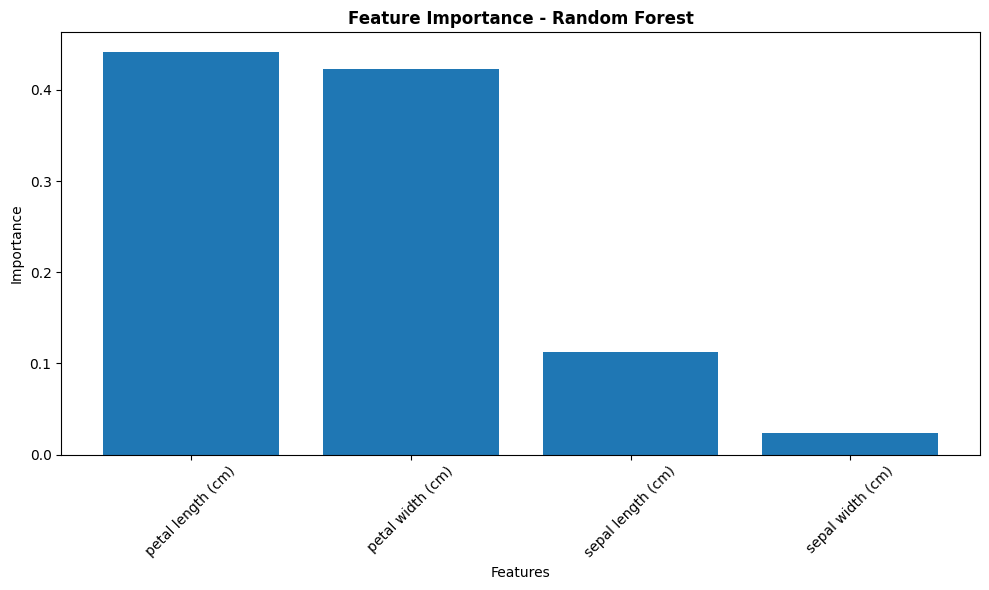

In [42]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
features = iris["feature_names"]
importances = rnd_clf_iris.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest", fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Boosting

**Boosting**: Ensemble method yang combines several **weak learners** into **strong learner**.

**General idea**: Train predictors **sequentially**, each trying to **correct predecessor**.

### Popular Boosting Methods:
1. **AdaBoost** (Adaptive Boosting)
2. **Gradient Boosting**
3. **XGBoost** (Extreme Gradient Boosting)

### 5.1 AdaBoost

**Key idea**: Pay more attention to training instances yang predecessor underfitted.

**Process**:
1. Train base classifier
2. Make predictions pada training set
3. **Increase weights** dari misclassified instances
4. Train second classifier dengan updated weights
5. Repeat...

**Prediction**: Weighted voting based on classifier accuracy

**Drawback**: Cannot be parallelized (sequential)

In [43]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Decision Stump
    n_estimators=200,
    algorithm="SAMME",  # use 'SAMME' for compatibility with this scikit-learn version
    learning_rate=0.5,
    random_state=42
)

ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print("=== AdaBoost Classifier ===")
print(f"Base estimator: Decision Stump (max_depth=1)")
print(f"n_estimators: 200")
print(f"learning_rate: 0.5")
print(f"\nAccuracy: {accuracy_ada:.4f}")

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


=== AdaBoost Classifier ===
Base estimator: Decision Stump (max_depth=1)
n_estimators: 200
learning_rate: 0.5

Accuracy: 0.8960


### 5.2 Gradient Boosting

**Different approach**: Fit new predictor to **residual errors** dari previous predictor.

**Process**:
1. Train first predictor
2. Compute residual errors
3. Train second predictor on residuals
4. Compute new residuals
5. Repeat...

**Prediction**: Sum predictions dari all trees

**Regularization**: Learning rate (shrinkage)

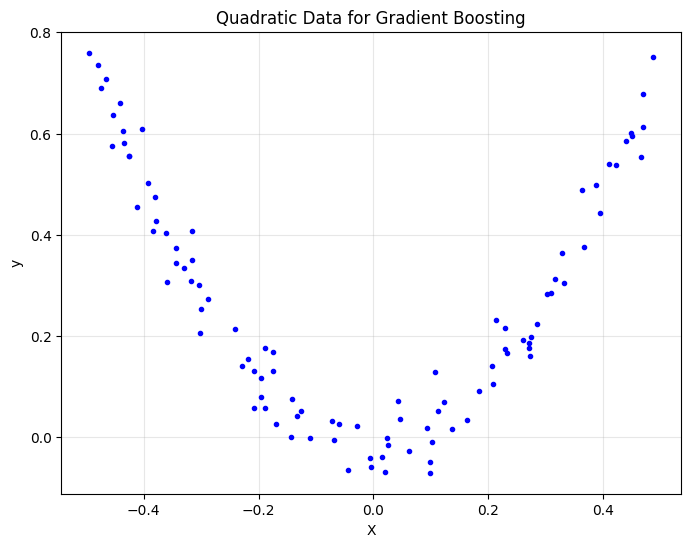

In [44]:
# Generate regression data
np.random.seed(42)
X_reg = np.random.rand(100, 1) - 0.5
y_reg = 3*X_reg[:, 0]**2 + 0.05 * np.random.randn(100)

plt.figure(figsize=(8, 6))
plt.plot(X_reg, y_reg, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Quadratic Data for Gradient Boosting")
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, 
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X_reg, y_reg)

print("=== Gradient Boosting Regressor ===")
print(f"max_depth: 2")
print(f"n_estimators: 3")
print(f"learning_rate: 1.0")

=== Gradient Boosting Regressor ===
max_depth: 2
n_estimators: 3
learning_rate: 1.0


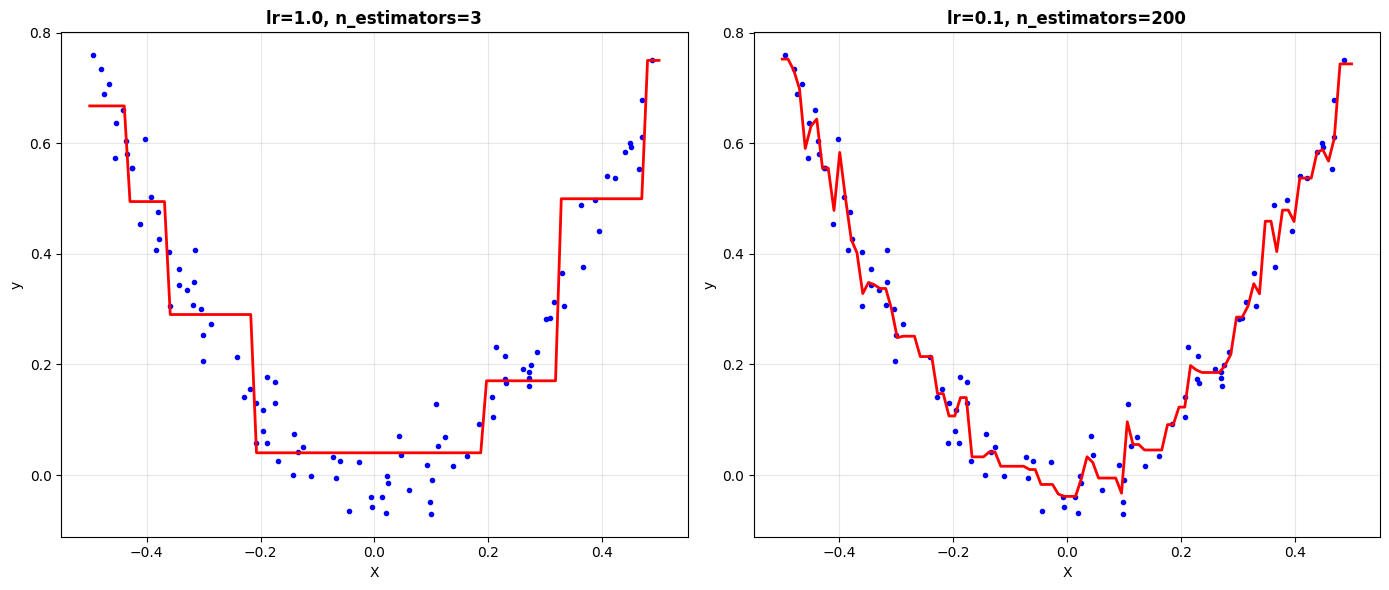


Observasi:
- Low learning rate needs more trees
- But predictions generalize better
- This is shrinkage regularization technique


In [46]:
# Compare learning rates
learning_rates = [1.0, 0.1]
n_estimators_list = [3, 200]

plt.figure(figsize=(14, 6))

for idx, (lr, n_est) in enumerate(zip(learning_rates, n_estimators_list), 1):
    gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=n_est,
                                     learning_rate=lr, random_state=42)
    gbrt.fit(X_reg, y_reg)
    
    X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)
    y_pred = gbrt.predict(X_new)
    
    plt.subplot(1, 2, idx)
    plt.plot(X_reg, y_reg, "b.")
    plt.plot(X_new, y_pred, "r-", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"lr={lr}, n_estimators={n_est}", fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservasi:")
print("- Low learning rate needs more trees")
print("- But predictions generalize better")
print("- This is shrinkage regularization technique")

### 5.3 Early Stopping

**Find optimal number of trees**: Use validation error.

**Method 1**: Train large number of trees, find optimal number later
**Method 2**: Stop training early when validation error stops improving

In [47]:
# Early stopping dengan staged_predict
from sklearn.metrics import mean_squared_error

X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train_reg, y_train_reg)

errors = [mean_squared_error(y_val_reg, y_pred)
          for y_pred in gbrt.staged_predict(X_val_reg)]

bst_n_estimators = np.argmin(errors) + 1

print("=== Early Stopping ===")
print(f"Optimal number of trees: {bst_n_estimators}")
print(f"Minimum validation error: {min(errors):.4f}")

=== Early Stopping ===
Optimal number of trees: 118
Minimum validation error: 0.0030


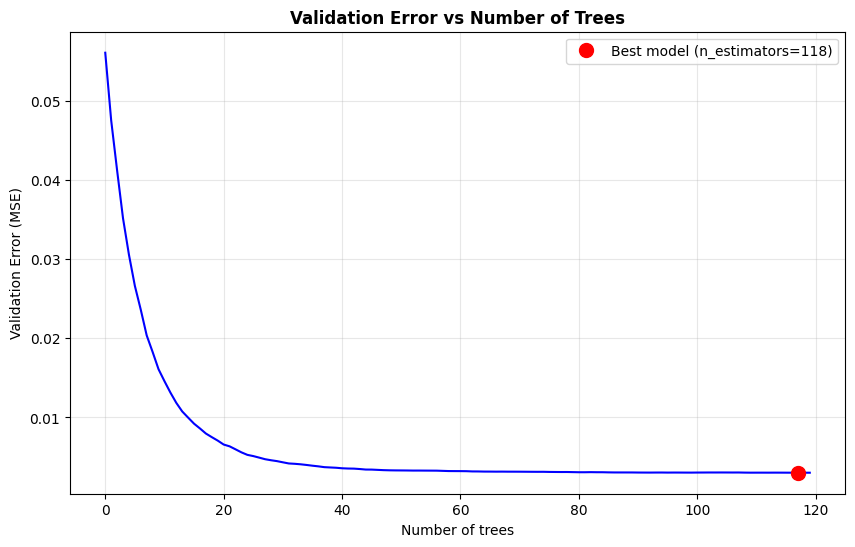

In [48]:
# Plot validation errors
plt.figure(figsize=(10, 6))
plt.plot(errors, "b-")
plt.plot(bst_n_estimators - 1, min(errors), "ro", markersize=10,
         label=f"Best model (n_estimators={bst_n_estimators})")
plt.xlabel("Number of trees")
plt.ylabel("Validation Error (MSE)")
plt.title("Validation Error vs Number of Trees", fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 5.4 XGBoost

**XGBoost (Extreme Gradient Boosting)**:
- Optimized implementation dari Gradient Boosting
- Extremely fast, scalable, and portable
- Often component dari winning ML competition entries
- API similar to Scikit-Learn
- Automatic early stopping

In [59]:
try:
    import xgboost
    
    # Basic model
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train_reg, y_train_reg)
    y_pred_xgb = xgb_reg.predict(X_val_reg)
    xgb_mse = mean_squared_error(y_val_reg, y_pred_xgb)
    
    print("=== XGBoost Regressor ===")
    print(f"Validation MSE: {xgb_mse:.4f}")
    
    # Model with early stopping (recommended method)
    xgb_reg_es = xgboost.XGBRegressor(
        n_estimators=1000,
        early_stopping_rounds=10,
        random_state=42
    )
    
    xgb_reg_es.fit(
        X_train_reg, y_train_reg,
        eval_set=[(X_val_reg, y_val_reg)],
        verbose=True
    )
    
    print(f"\n=== XGBoost with Early Stopping ===")
    print(f"Best iteration: {xgb_reg_es.best_iteration}")
    print(f"Best score: {xgb_reg_es.best_score}")
    
except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")


=== XGBoost Regressor ===
Validation MSE: 0.0035
[0]	validation_0-rmse:0.20061
[1]	validation_0-rmse:0.15905
[2]	validation_0-rmse:0.12883
[3]	validation_0-rmse:0.10809
[4]	validation_0-rmse:0.09428
[5]	validation_0-rmse:0.08367
[6]	validation_0-rmse:0.07566
[7]	validation_0-rmse:0.07015
[8]	validation_0-rmse:0.06622
[9]	validation_0-rmse:0.06344
[10]	validation_0-rmse:0.06173
[11]	validation_0-rmse:0.06039
[12]	validation_0-rmse:0.05943
[13]	validation_0-rmse:0.05845
[14]	validation_0-rmse:0.05781
[15]	validation_0-rmse:0.05731
[16]	validation_0-rmse:0.05707
[17]	validation_0-rmse:0.05707
[18]	validation_0-rmse:0.05713
[19]	validation_0-rmse:0.05706
[20]	validation_0-rmse:0.05712
[21]	validation_0-rmse:0.05712
[22]	validation_0-rmse:0.05733
[23]	validation_0-rmse:0.05730
[24]	validation_0-rmse:0.05726
[25]	validation_0-rmse:0.05754
[26]	validation_0-rmse:0.05758
[27]	validation_0-rmse:0.05751
[28]	validation_0-rmse:0.05743
[29]	validation_0-rmse:0.05764

=== XGBoost with Early Stoppin

## 6. Stacking

**Stacking (Stacked Generalization)**: Train model to **aggregate predictions** dari all predictors.

### 6.1 How It Works

**Layer 1 (Predictors)**:
- Train diverse predictors on training set
- Make predictions

**Layer 2 (Blender/Meta Learner)**:
- Takes predictions from layer 1 as input
- Learns to predict target value
- Trained on hold-out set

**Multiple layers**: Can stack multiple blenders!

### 6.2 Training Process

1. **Split training set** into two subsets
2. **Train layer 1** predictors on first subset
3. **Make predictions** on second subset (hold-out set)
4. **Create new training set** using these predictions
5. **Train blender** on this new training set

**For multiple layers**:
- Split training set into 3+ subsets
- Use predictions from each layer to train next layer

**Note**: Scikit-Learn doesn't support stacking directly, tapi dapat implemented manually atau use libraries seperti DESlib.

## 7. Summary & Best Practices

### Ensemble Methods Comparison:

| Method | Training | Prediction | Parallelization | Best For |
|--------|----------|------------|-----------------|----------|
| **Voting** | Independent | Fast | Yes | Diverse algorithms |
| **Bagging** | Independent | Fast | Yes | Reduce variance |
| **Random Forests** | Independent | Fast | Yes | General purpose |
| **Boosting** | Sequential | Fast | No | Reduce bias |
| **Stacking** | Mixed | Slower | Partial | Maximum performance |

### When to Use:

**Voting Classifiers**:
- Already have several good models
- Want simple combination
- Use soft voting jika possible

**Bagging/Random Forests**:
- Want to reduce variance
- Need parallelization
- General-purpose problems
- Try Random Forests first!

**Boosting**:
- Want to reduce bias
- Sequential training acceptable
- AdaBoost: Simple, effective
- Gradient Boosting: More powerful
- XGBoost: Production-ready

**Stacking**:
- Maximum performance needed
- ML competitions
- Have time untuk complex setup

### Important Notes:

✓ **Diversity is key**: Predictors should be as independent as possible

✓ **Winning competitions**: Often use multiple ensemble methods

✓ **Random Forests**: Start here untuk most problems

✓ **Feature importance**: Use Random Forests untuk quick understanding

✓ **Early stopping**: Always use untuk Gradient Boosting

✓ **Parallelization**: Bagging dan Random Forests scale well

✓ **Overfitting**: 
- Bagging/Random Forests: Reduce n_estimators
- AdaBoost: Reduce n_estimators atau regularize base estimator
- Gradient Boosting: Reduce learning_rate atau n_estimators

✓ **Underfitting**:
- AdaBoost: Increase n_estimators
- Gradient Boosting: Increase n_estimators atau learning_rate

## Kesimpulan

Chapter 7 memberikan comprehensive understanding tentang Ensemble Learning:

✓ **Voting Classifiers**: Hard & soft voting untuk combine diverse models

✓ **Bagging & Pasting**: Train pada random subsets dengan/tanpa replacement

✓ **Random Forests**: One of most powerful ML algorithms, ensemble of Decision Trees

✓ **Extra-Trees**: Even more randomness, faster training

✓ **Feature Importance**: Measure relative importance of features

✓ **Out-of-Bag Evaluation**: Automatic validation without separate validation set

✓ **AdaBoost**: Sequential training dengan instance weight updates

✓ **Gradient Boosting**: Fit new predictor to residual errors

✓ **XGBoost**: Optimized implementation untuk production

✓ **Stacking**: Train meta learner to aggregate predictions

Ensemble methods adalah **among most powerful** ML techniques available. Winning solutions dalam ML competitions almost always involve multiple ensemble methods. **Random Forests** adalah great starting point untuk most problems, dan **Gradient Boosting** (especially XGBoost) often provides best performance untuk structured data.

---